In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv(r"C:\Users\manda\Desktop\anime.csv")

In [3]:
df.head()

,id,Title,Votes,Status,Types,Episodes,Score,Source,Members,Popularity,Favourites,Rating,Year,Season,Genres,Studios
0,5114,Fullmetal Alchemist: Brotherhood,1846307.0,finished_airing,tv,64.0,9.14,manga,2897486.0,3.0,202552.0,r,2009.0,spring,"['Action', 'Adventure', 'Drama', 'Fantasy', 'M...",['Bones']
1,11061,Hunter x Hunter (2011),1488156.0,finished_airing,tv,148.0,9.05,manga,2387337.0,10.0,182740.0,pg_13,2011.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']","['Madhouse', 'Studio Live']"
2,9253,Steins;Gate,1240087.0,finished_airing,tv,24.0,9.08,visual_novel,2248209.0,13.0,171579.0,pg_13,2011.0,spring,"['Drama', 'Psychological', 'Sci-Fi', 'Suspense...",['White Fox']
3,21,One Piece,1076776.0,currently_airing,tv,NaN,8.65,manga,1893379.0,26.0,167571.0,pg_13,1999.0,fall,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['Toei Animation']
4,1535,Death Note,2426765.0,finished_airing,tv,37.0,8.62,manga,3421349.0,2.0,155891.0,r,2006.0,fall,"['Psychological', 'Shounen', 'Supernatural', '...",['Madhouse']


In [4]:
df.sample(5)

,id,Title,Votes,Status,Types,Episodes,Score,Source,Members,Popularity,Favourites,Rating,Year,Season,Genres,Studios
14903,44329,Lan Mao Long Qi Tuan Zhi Xuan Di Chuanqi,NaN,finished_airing,tv,76.0,NaN,original,NaN,NaN,NaN,pg,NaN,NaN,"['Adventure', 'Fantasy', 'Kids']",NaN
5482,28539,Garo Movie: Divine Flame,7788.0,finished_airing,movie,1.0,7.56,original,22861.0,3988.0,20.0,r+,2016.0,spring,"['Action', 'Fantasy', 'Mythology', 'Supernatur...",['MAPPA']
19879,23713,Nagareboshi no Okurimono,19.0,finished_airing,ova,1.0,NaN,NaN,147.0,17967.0,NaN,g,NaN,NaN,"['Fantasy', 'Kids']",['Toei Animation']
4183,37651,Fate/Extra: Last Encore - Illustrias Tendousetsu,32330.0,finished_airing,tv,3.0,6.51,game,63040.0,2342.0,42.0,r,2018.0,summer,"['Action', 'Fantasy']",['Shaft']
13278,48129,Mofa Shu Leyuan,7.0,finished_airing,movie,1.0,NaN,original,70.0,19029.0,NaN,pg,2021.0,winter,"['Comedy', 'Kids']",NaN


In [5]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(24030, 16)
Index(['id', 'Title', 'Votes', 'Status', 'Types', 'Episodes', 'Score',
       'Source', 'Members', 'Popularity', 'Favourites', 'Rating', 'Year',
       'Season', 'Genres', 'Studios'],
      dtype='object')
id              int64
Title          object
Votes         float64
Status         object
Types          object
Episodes      float64
Score         float64
Source         object
Members       float64
Popularity    float64
Favourites    float64
Rating         object
Year          float64
Season         object
Genres         object
Studios        object
dtype: object


In [6]:
df.isnull().sum()

id                0
Title             0
Votes          3786
Status            0
Types             0
Episodes        802
Score          9859
Source         3774
Members        3474
Popularity     3474
Favourites    10805
Rating         1016
Year           6459
Season         6459
Genres          164
Studios       11002
dtype: int64

In [7]:
df.dropna(subset=['Votes', 'Episodes', 'Source', 'Members', 'Popularity', 'Rating', 'Genres', 'Studios'], inplace=True)

df['Score'].fillna(df['Score'].median(), inplace=True)
df['Favourites'].fillna(df['Favourites'].median(), inplace=True)
df['Season'].fillna(df['Season'].mode()[0], inplace=True)
df['Year'].fillna(df['Year'].median(), inplace=True)


In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [9]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=np.number)
IQR = numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
outlier_counts_iqr = ((numeric_df < (numeric_df.quantile(0.25) - 1.5 * IQR)) | (numeric_df > (numeric_df.quantile(0.75) + 1.5 * IQR))).sum()

z = np.abs(stats.zscore(numeric_df))
outlier_counts_z = pd.Series((z > 3).sum(axis=0), index=numeric_df.columns).to_dict()

print(outlier_counts_z)

{'id': 0, 'Votes': 194, 'Episodes': 89, 'Score': 51, 'Members': 227, 'Popularity': 0, 'Favourites': 119, 'Year': 148}


<Figure size 2000x1500 with 0 Axes>

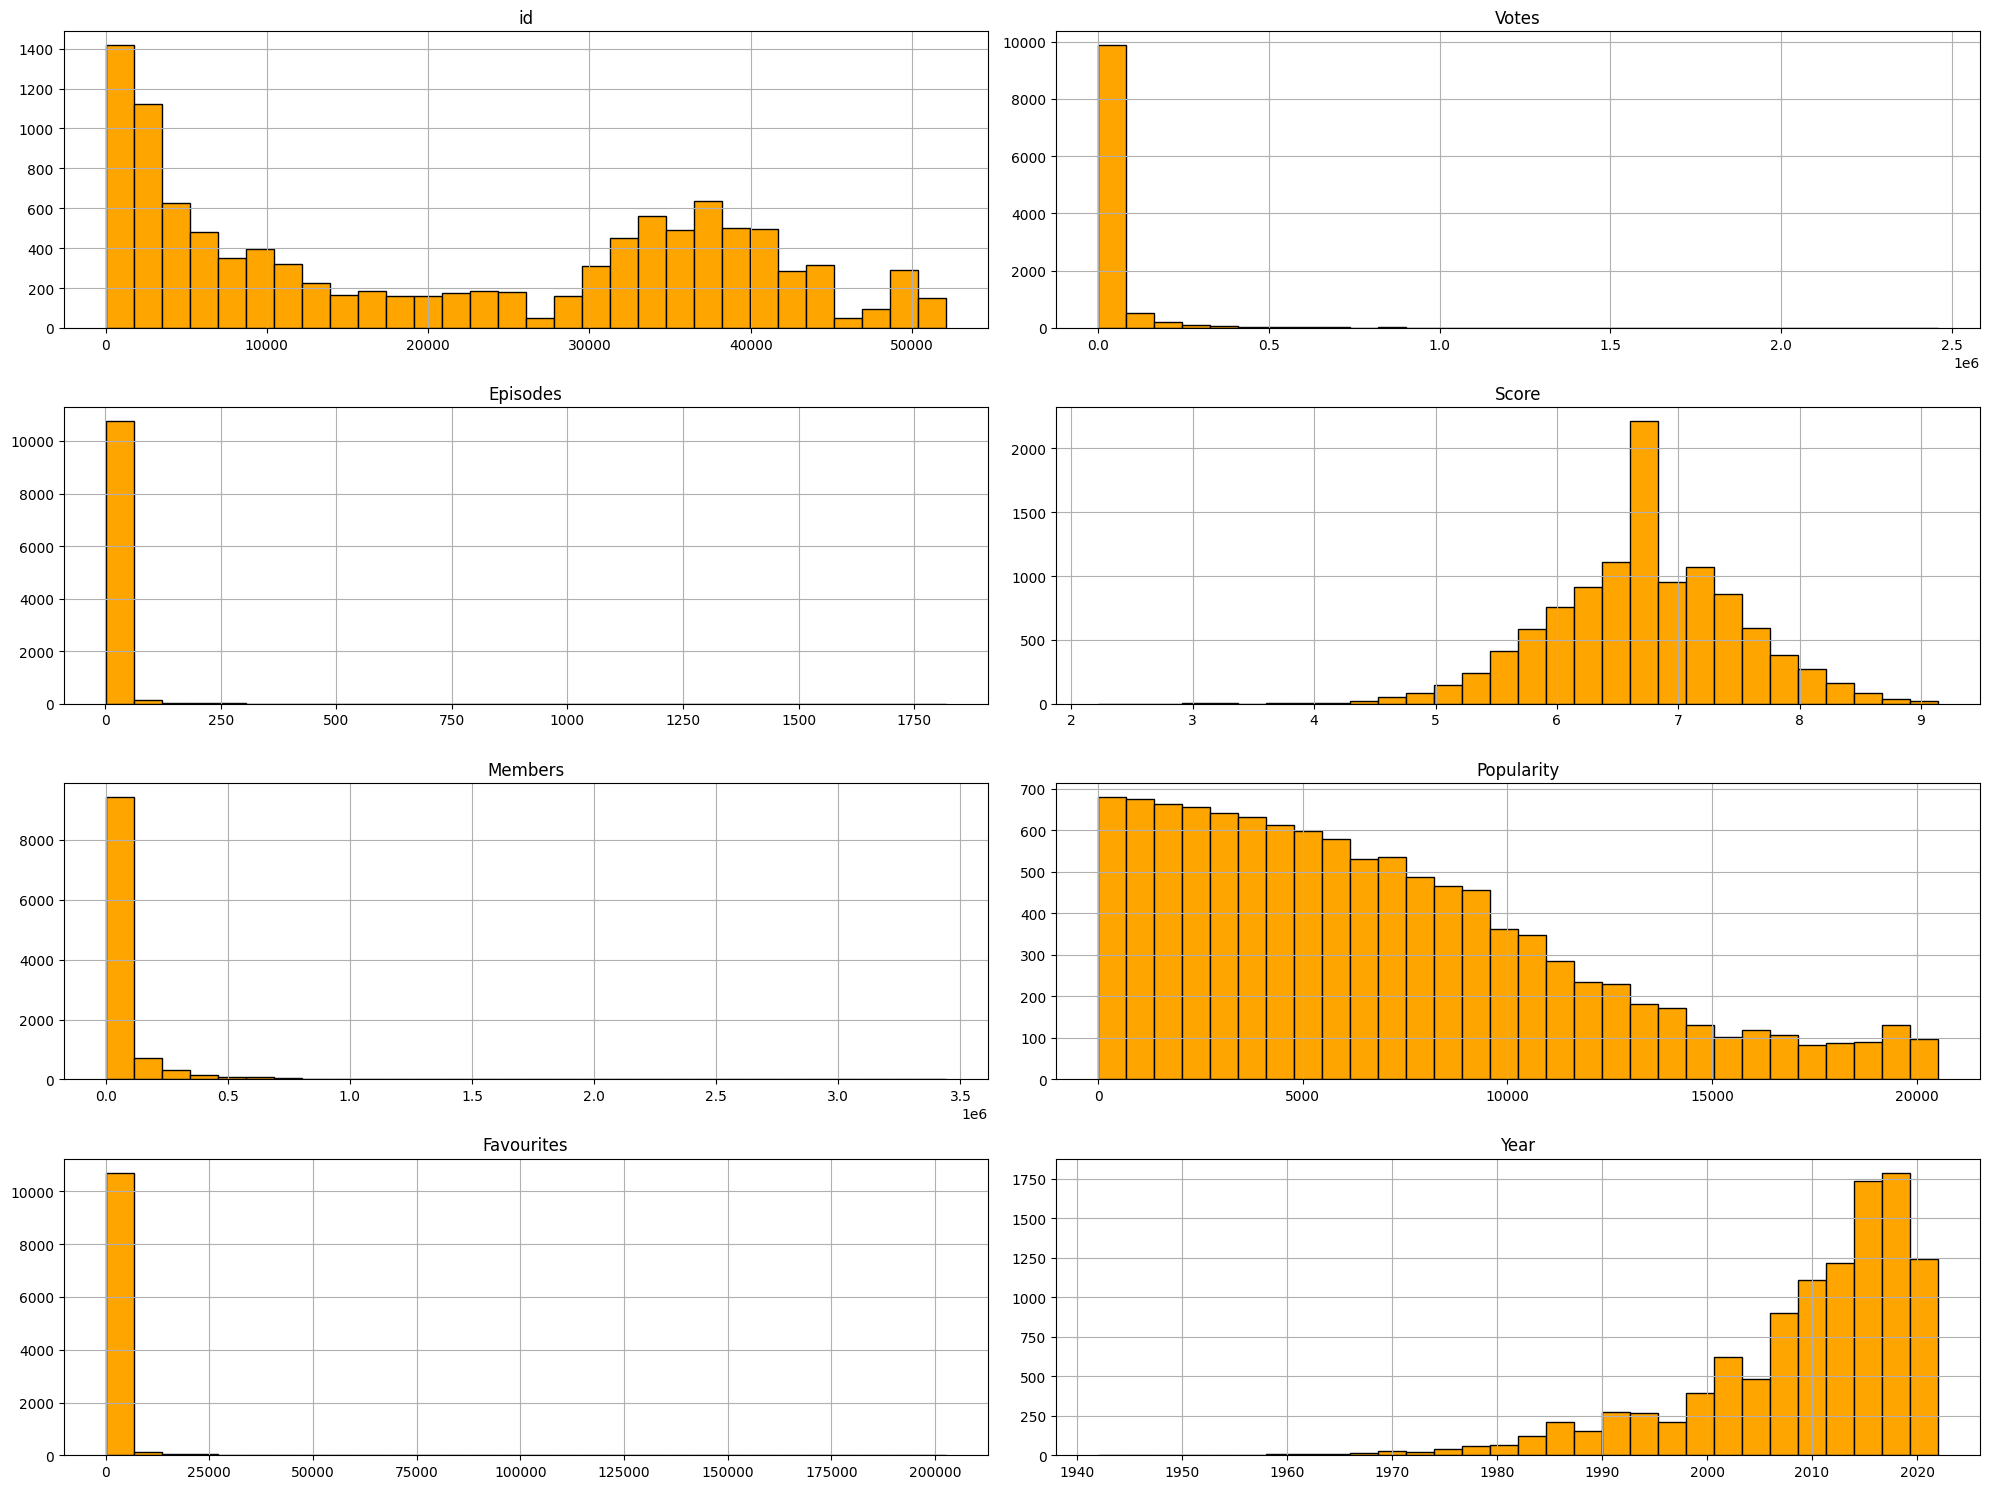

In [10]:
plt.figure(figsize=(20, 15))
numeric_df.hist(bins=30, figsize=(20, 15), layout=(4, 2), color='orange', edgecolor='black')
plt.tight_layout()
plt.show()

In [11]:
print(f"The shape of the dataset before removing the outliers is {df.shape}")
# Removing outliers using IQR method, except for 'Score' column
filtered_cols = numeric_df.columns.difference(['Score'])
Q1 = numeric_df[filtered_cols].quantile(0.25)
Q3 = numeric_df[filtered_cols].quantile(0.75)
IQR_filtered = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR_filtered
upper_bound = Q3 + 1.5 * IQR_filtered

iqr_mask = ~((numeric_df[filtered_cols] < lower_bound) | (numeric_df[filtered_cols] > upper_bound)).any(axis=1)
df = df[iqr_mask]

# Treating outliers in 'Score' column using z-score method
df = df[np.abs(stats.zscore(df['Score'])) <= 3]
print(f"The shape of the dataset after removing the outliers is {df.shape}")

The shape of the dataset before removing the outliers is (10982, 16)
The shape of the dataset after removing the outliers is (7719, 16)


                    mean       50%      variance   skewness
id          21071.657075  19583.00  2.733783e+08   0.151232
Votes       37616.707977   3394.50  1.573373e+10   7.901659
Episodes       12.555454      3.00  1.252887e+03  27.367545
Score           6.720879      6.73  5.992254e-01  -0.226433
Members     72218.472865   8958.50  4.249974e+10   6.494500
Popularity   6737.292296   5862.50  2.372206e+07   0.794468
Favourites    850.846385     25.00  3.295984e+07  17.983226
Year         2009.229011   2012.00  1.136207e+02  -1.444389


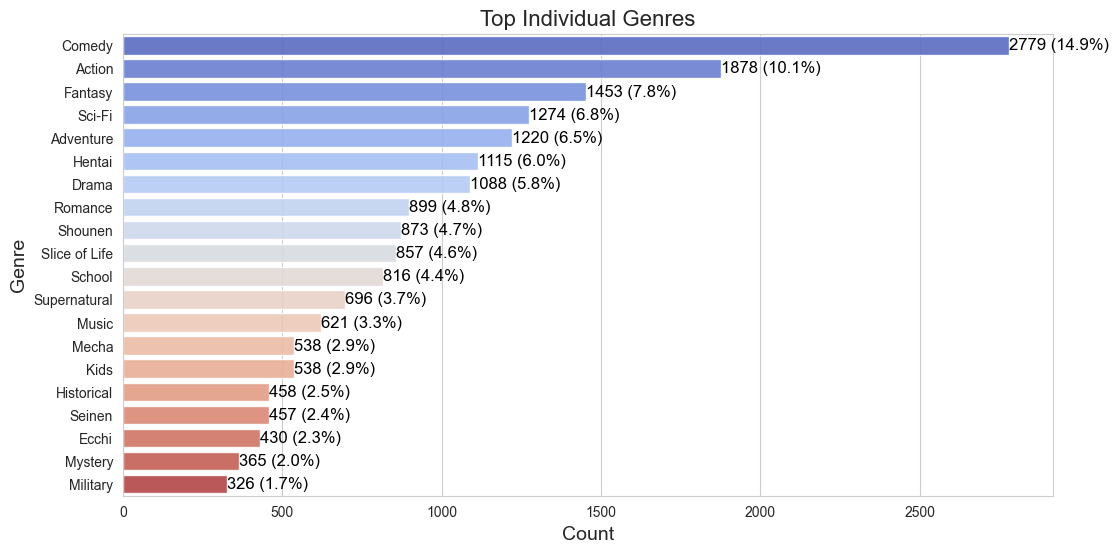

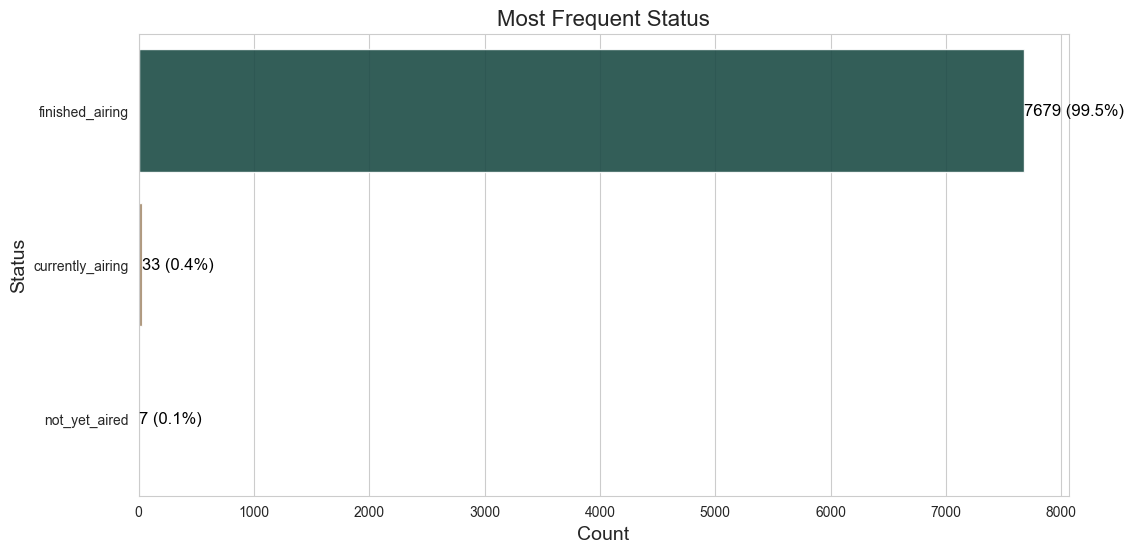

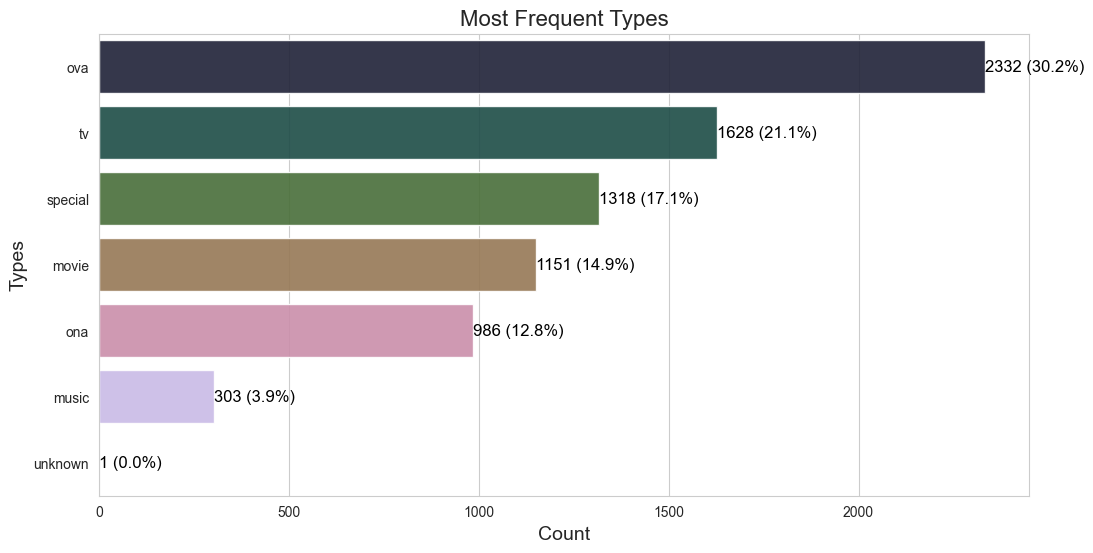

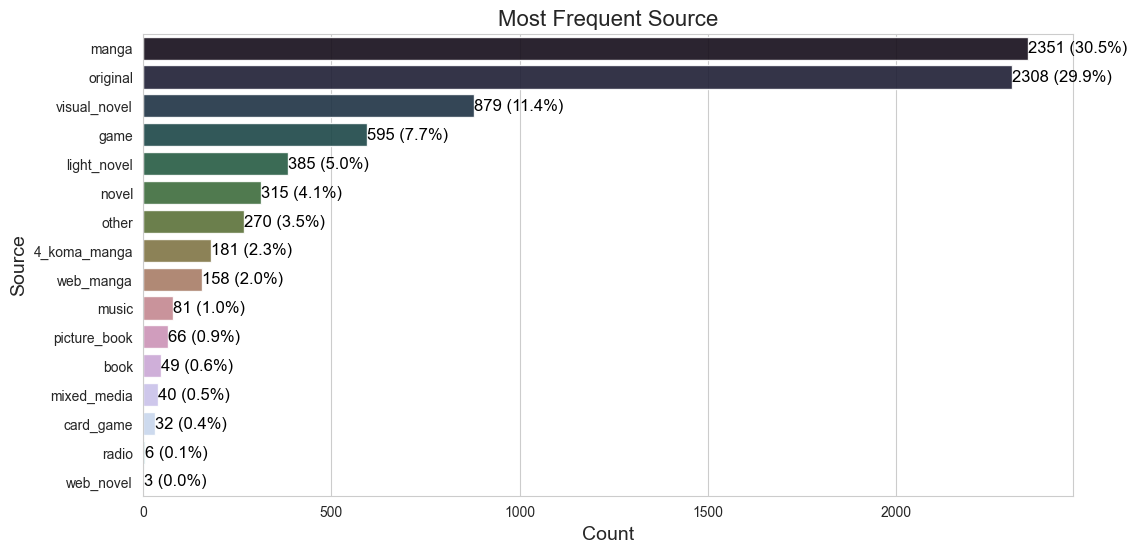

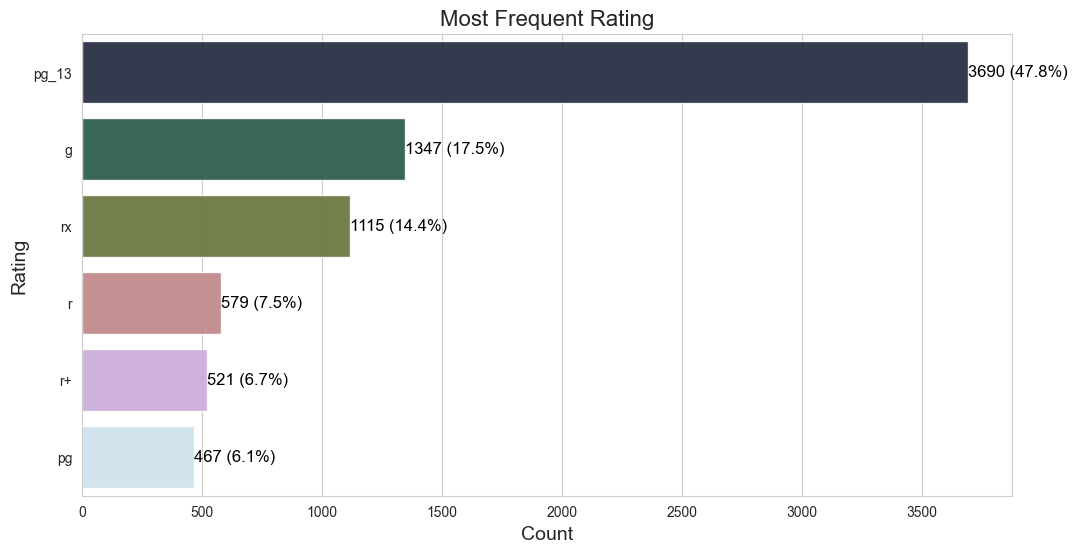

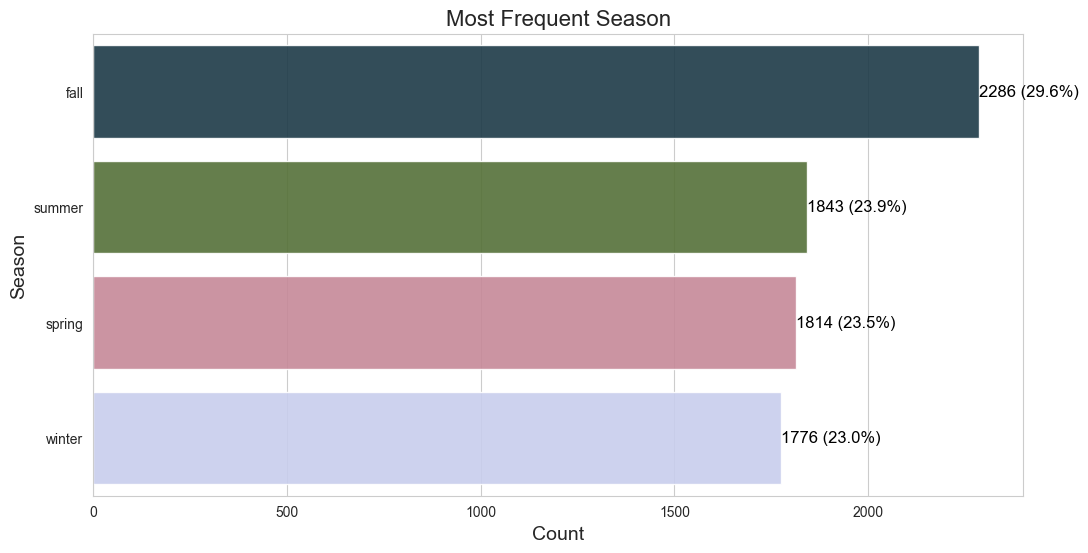

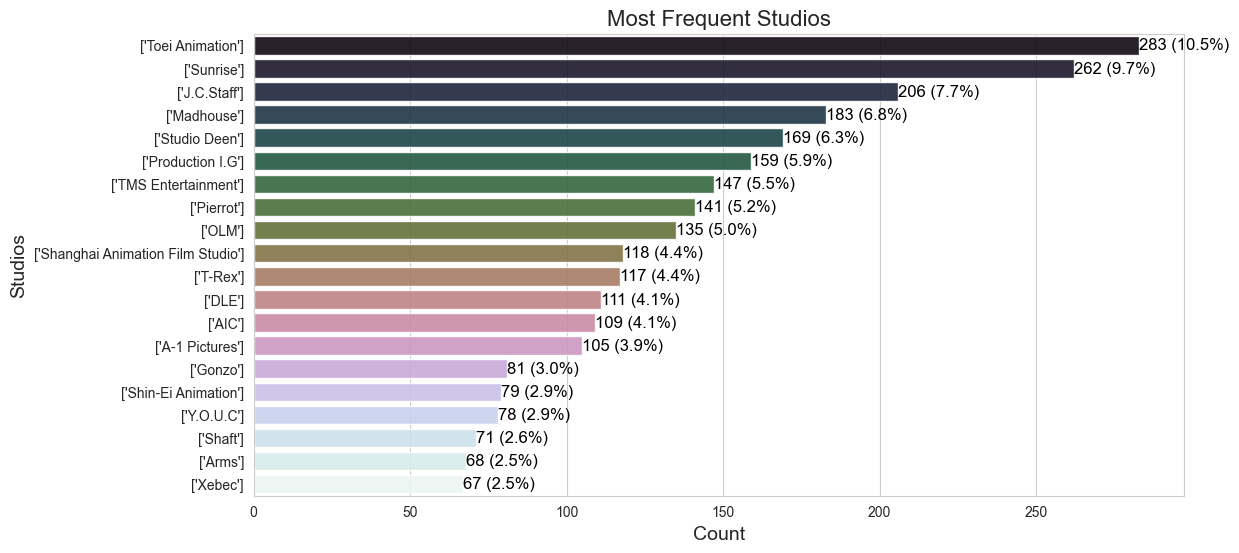

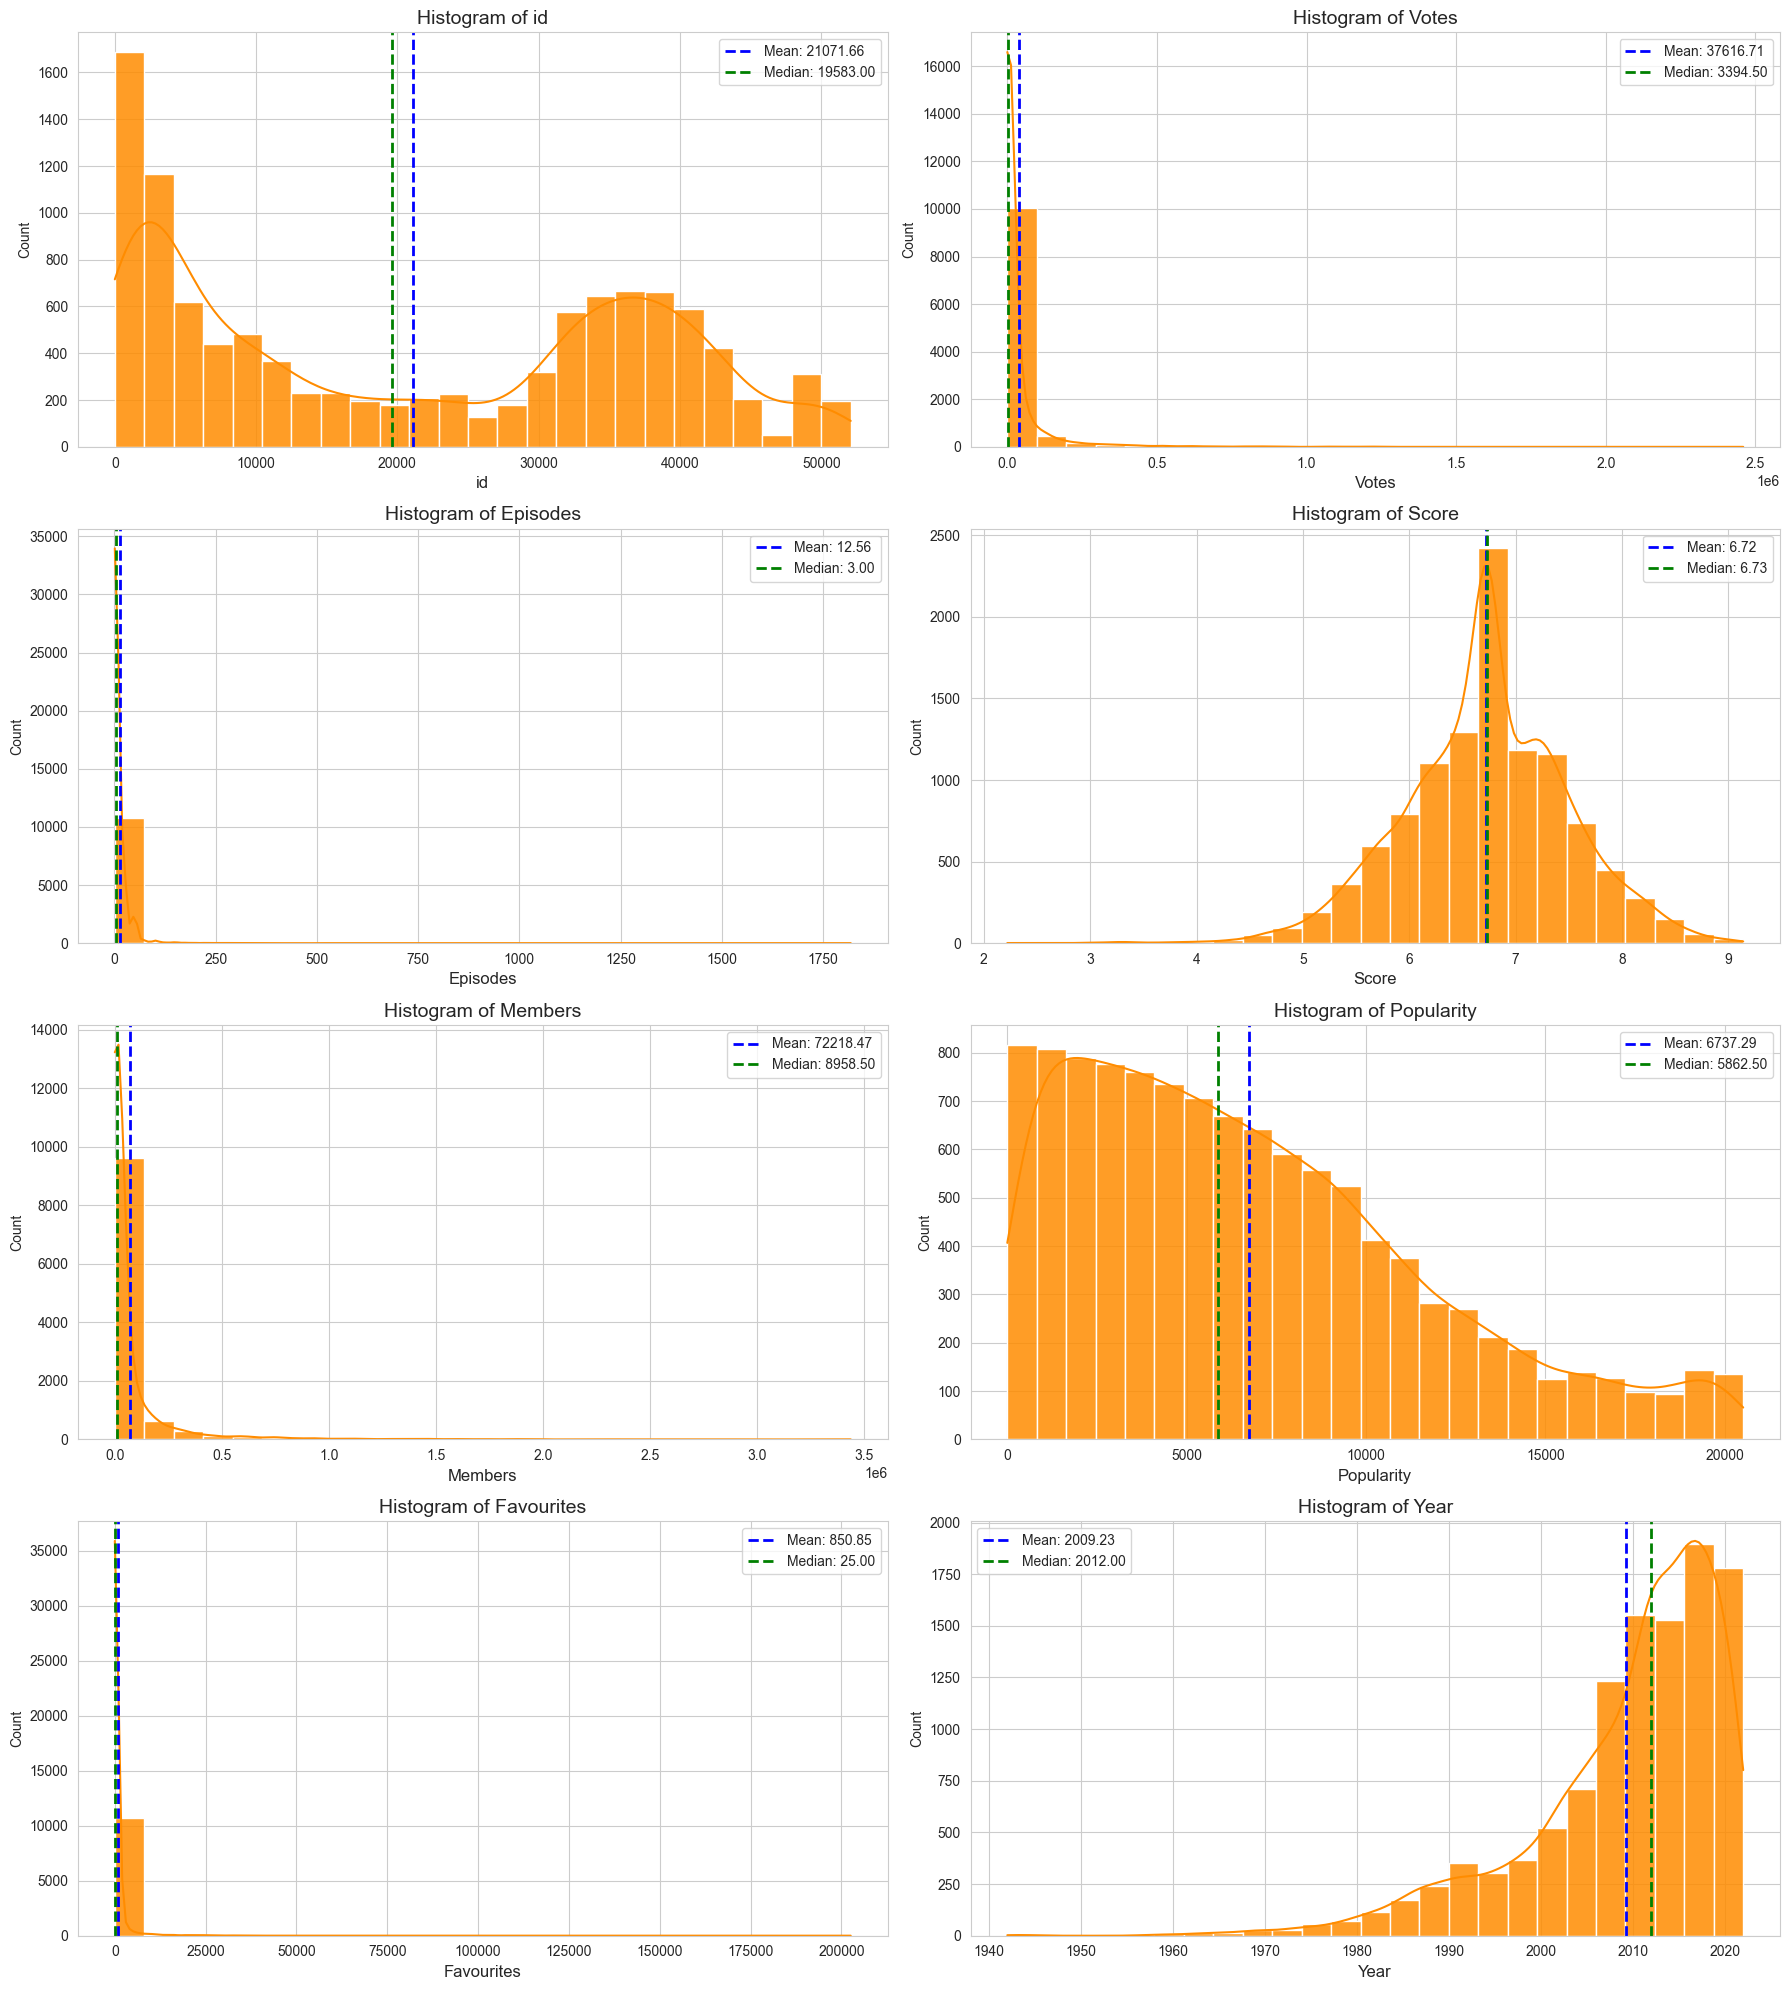

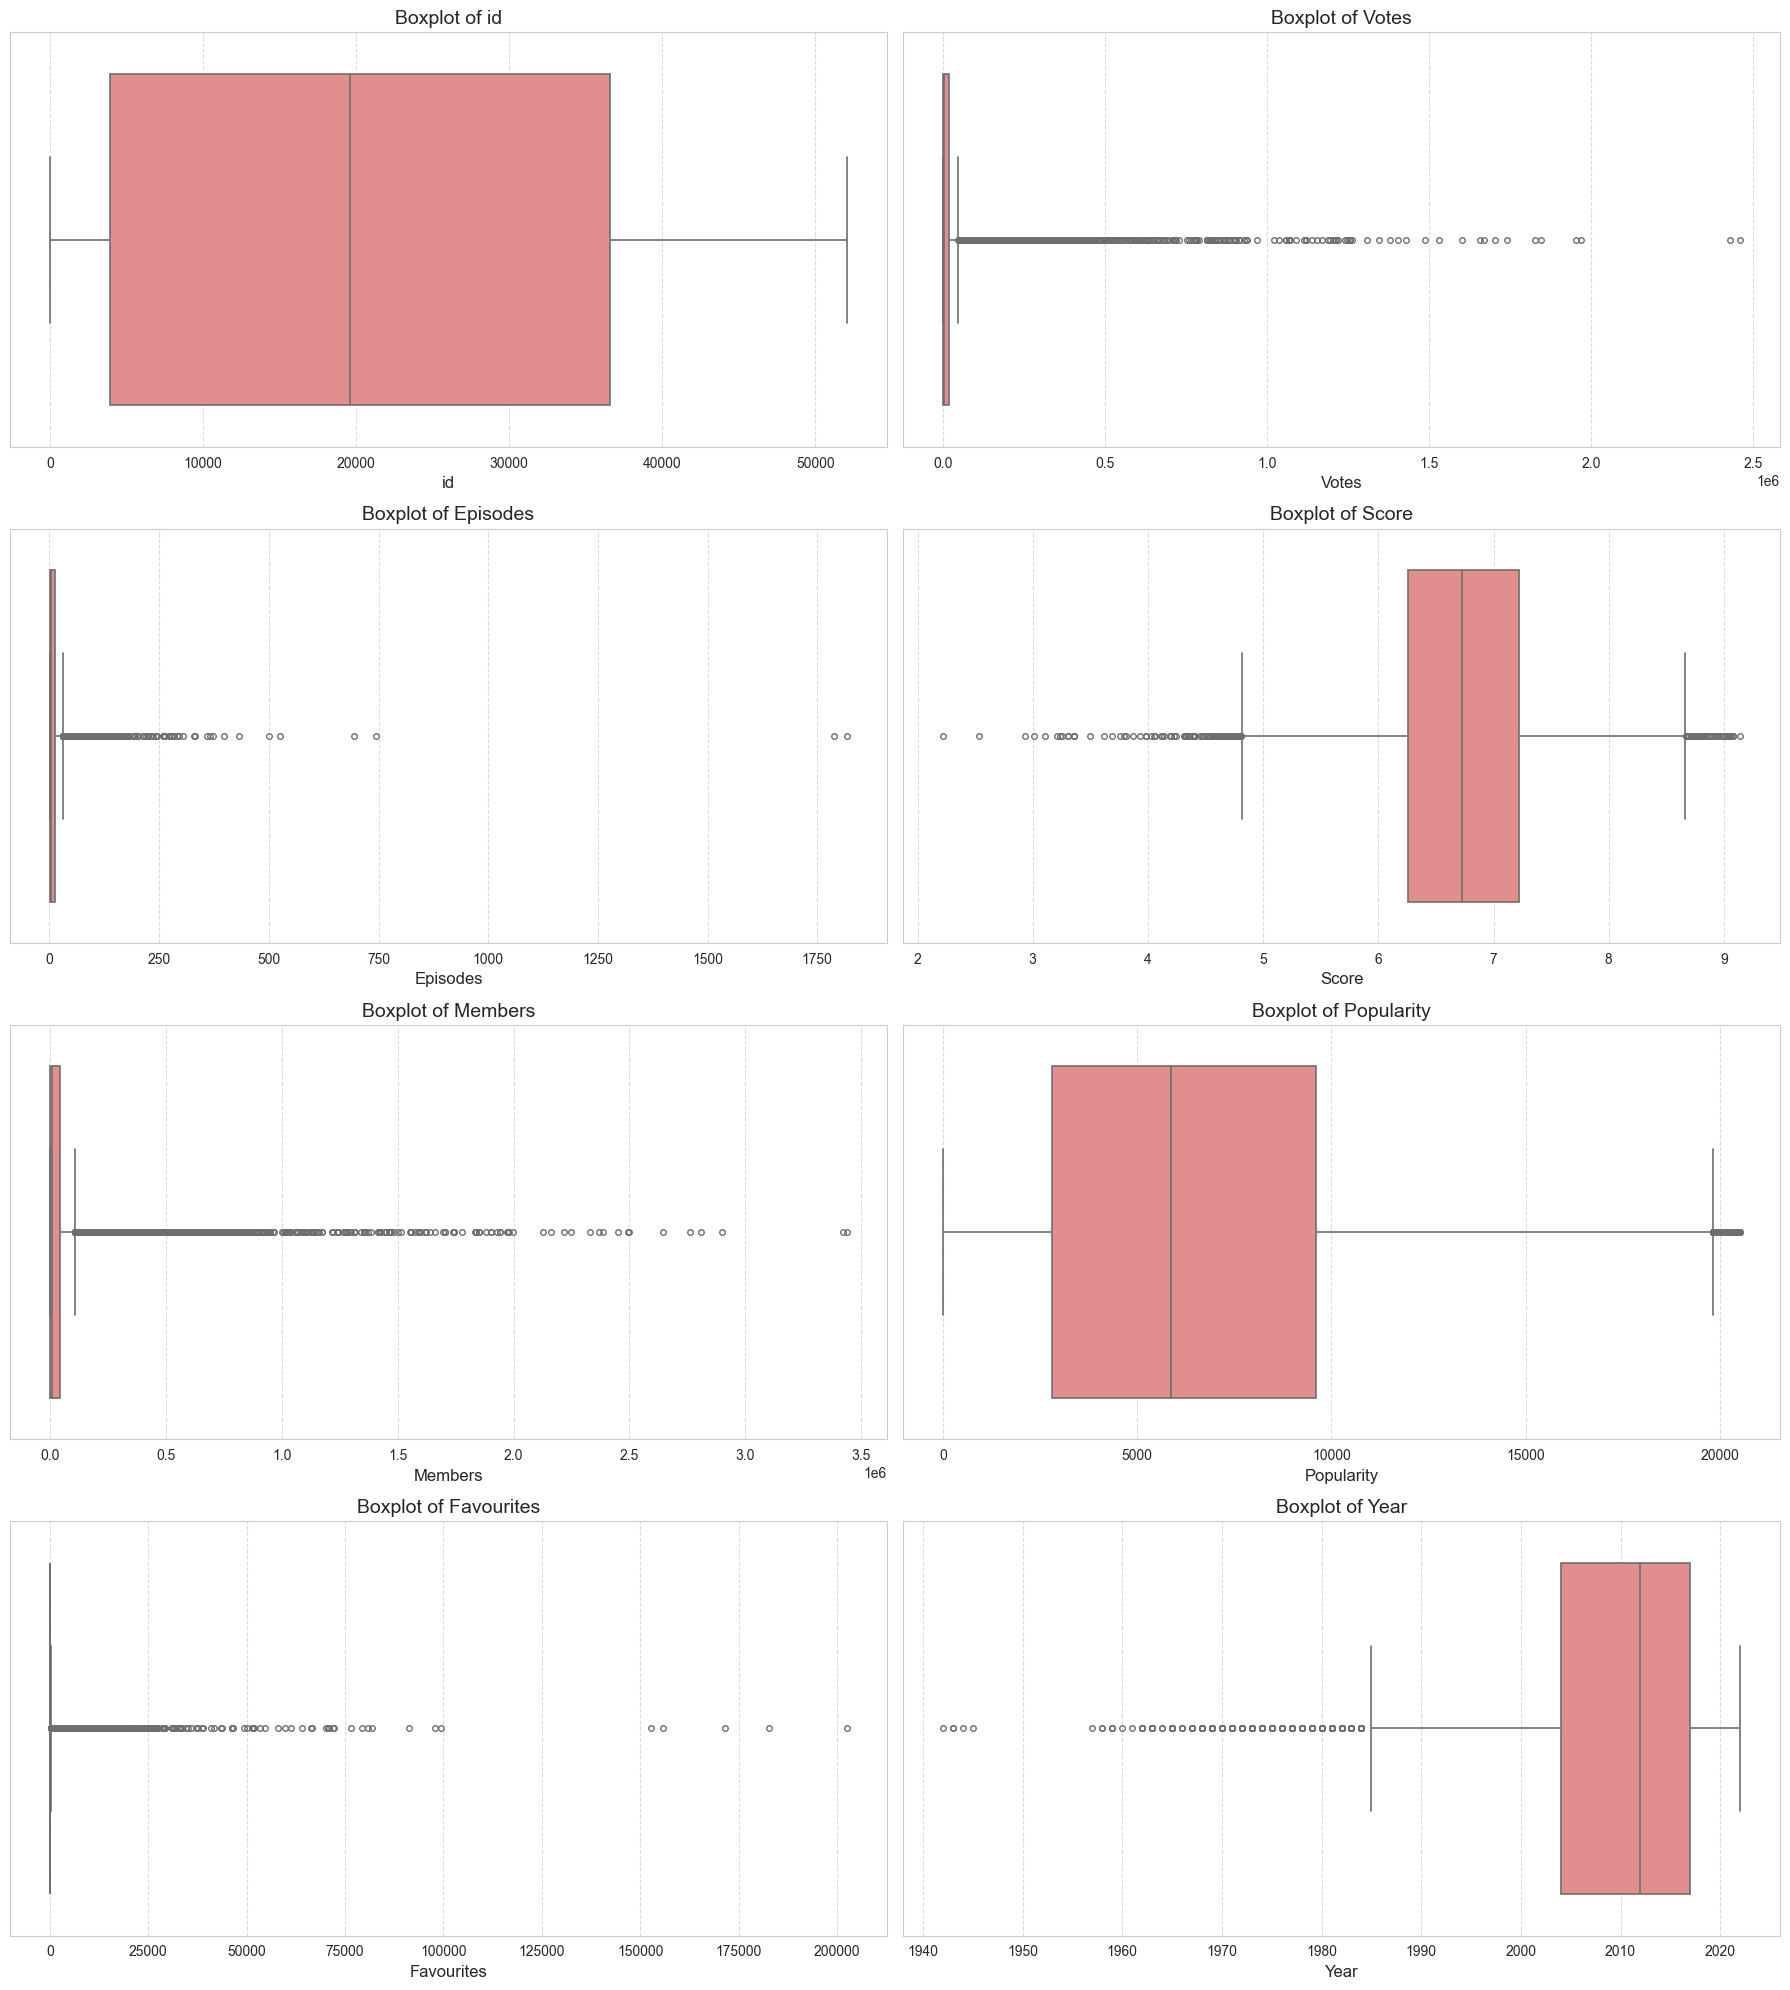

In [12]:
import warnings
import ast
from collections import Counter

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style("whitegrid")

numeric_summary = numeric_df.describe().T.assign(
    variance=numeric_df.var(),
    skewness=numeric_df.skew()
)
print(numeric_summary[['mean', '50%', 'variance', 'skewness']])

genre_counts = Counter()
df['Genres'].dropna().apply(lambda x: genre_counts.update(ast.literal_eval(x)))

genre_series = pd.Series(genre_counts).sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_series.values, y=genre_series.index, palette='coolwarm', alpha=0.9)
plt.title("Top Individual Genres", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Genre", fontsize=14)

total = genre_series.sum()
for p in ax.patches:
    count = int(p.get_width())
    percentage = f"{(count / total) * 100:.1f}%"
    ax.annotate(f"{count} ({percentage})", (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=12, color='black')
plt.show()

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    if col not in ['Title', 'Genres'] and col in df.columns:
        value_counts = df[col].value_counts().head(20)
        plt.figure(figsize=(12, 6))
        ax = sns.barplot(x=value_counts.values, y=value_counts.index, palette='cubehelix', alpha=0.9)
        plt.title(f"Most Frequent {col}", fontsize=16)
        plt.xlabel("Count", fontsize=14)
        plt.ylabel(col, fontsize=14)
        total = value_counts.sum()
        for p in ax.patches:
            count = int(p.get_width())
            percentage = f"{(count / total) * 100:.1f}%"
            ax.annotate(f"{count} ({percentage})", (p.get_width(), p.get_y() + p.get_height() / 2), 
                        ha='left', va='center', fontsize=12, color='black')
        plt.show()

num_cols = len(numeric_df.columns)
rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], bins=25, kde=True, ax=axes[i], color='darkorange', alpha=0.85)
    axes[i].axvline(numeric_df[col].mean(), color='blue', linestyle='dashed', linewidth=2, label=f"Mean: {numeric_df[col].mean():.2f}")
    axes[i].axvline(numeric_df[col].median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {numeric_df[col].median():.2f}")
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Histogram of {col}", fontsize=14)
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(rows, 2, figsize=(18, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[col], ax=axes[i], color='lightcoral', fliersize=4, linewidth=1.2)
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

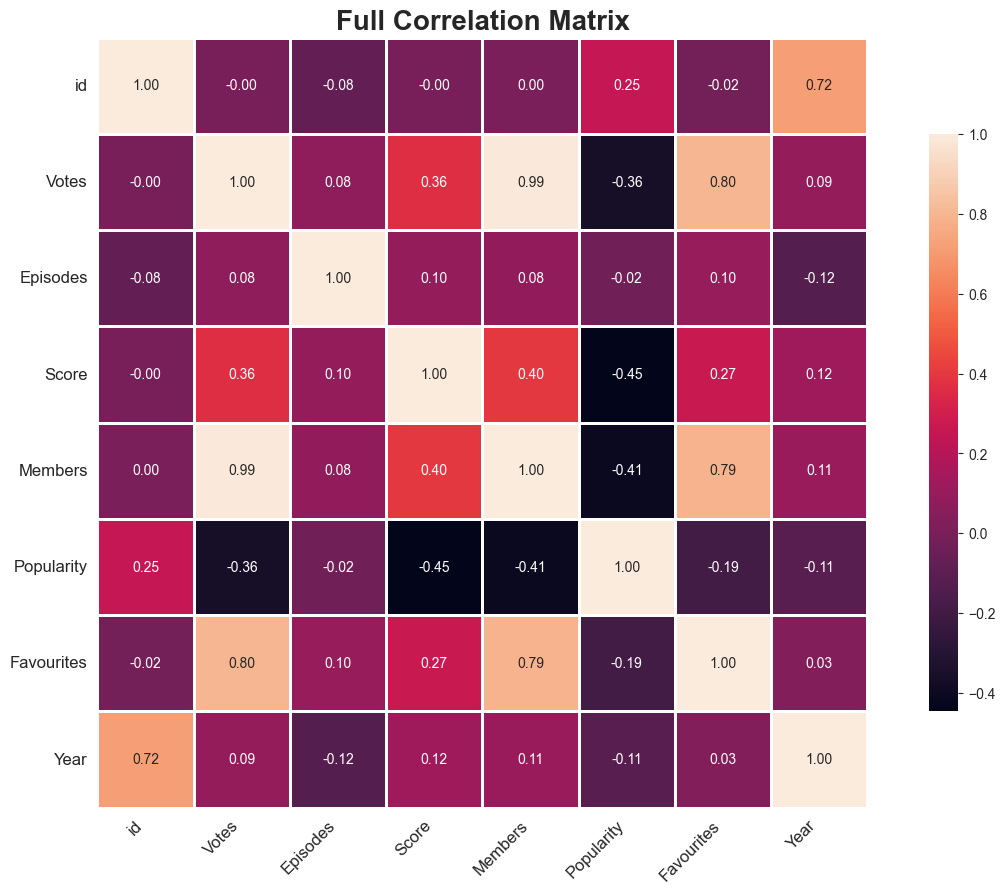

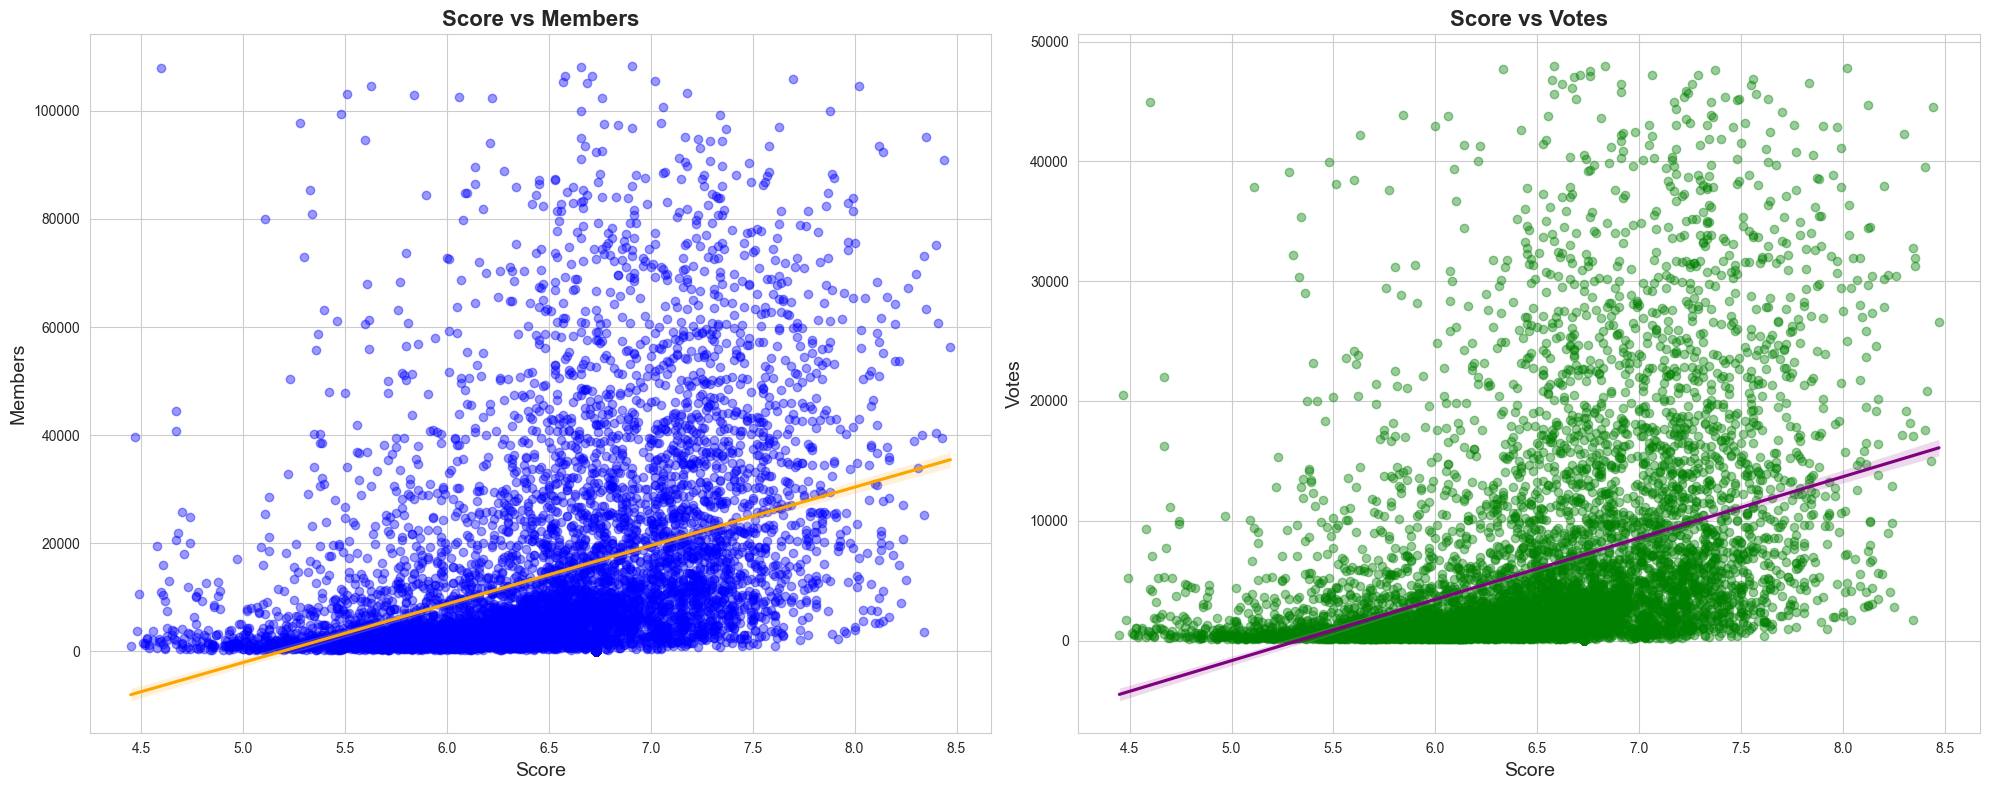

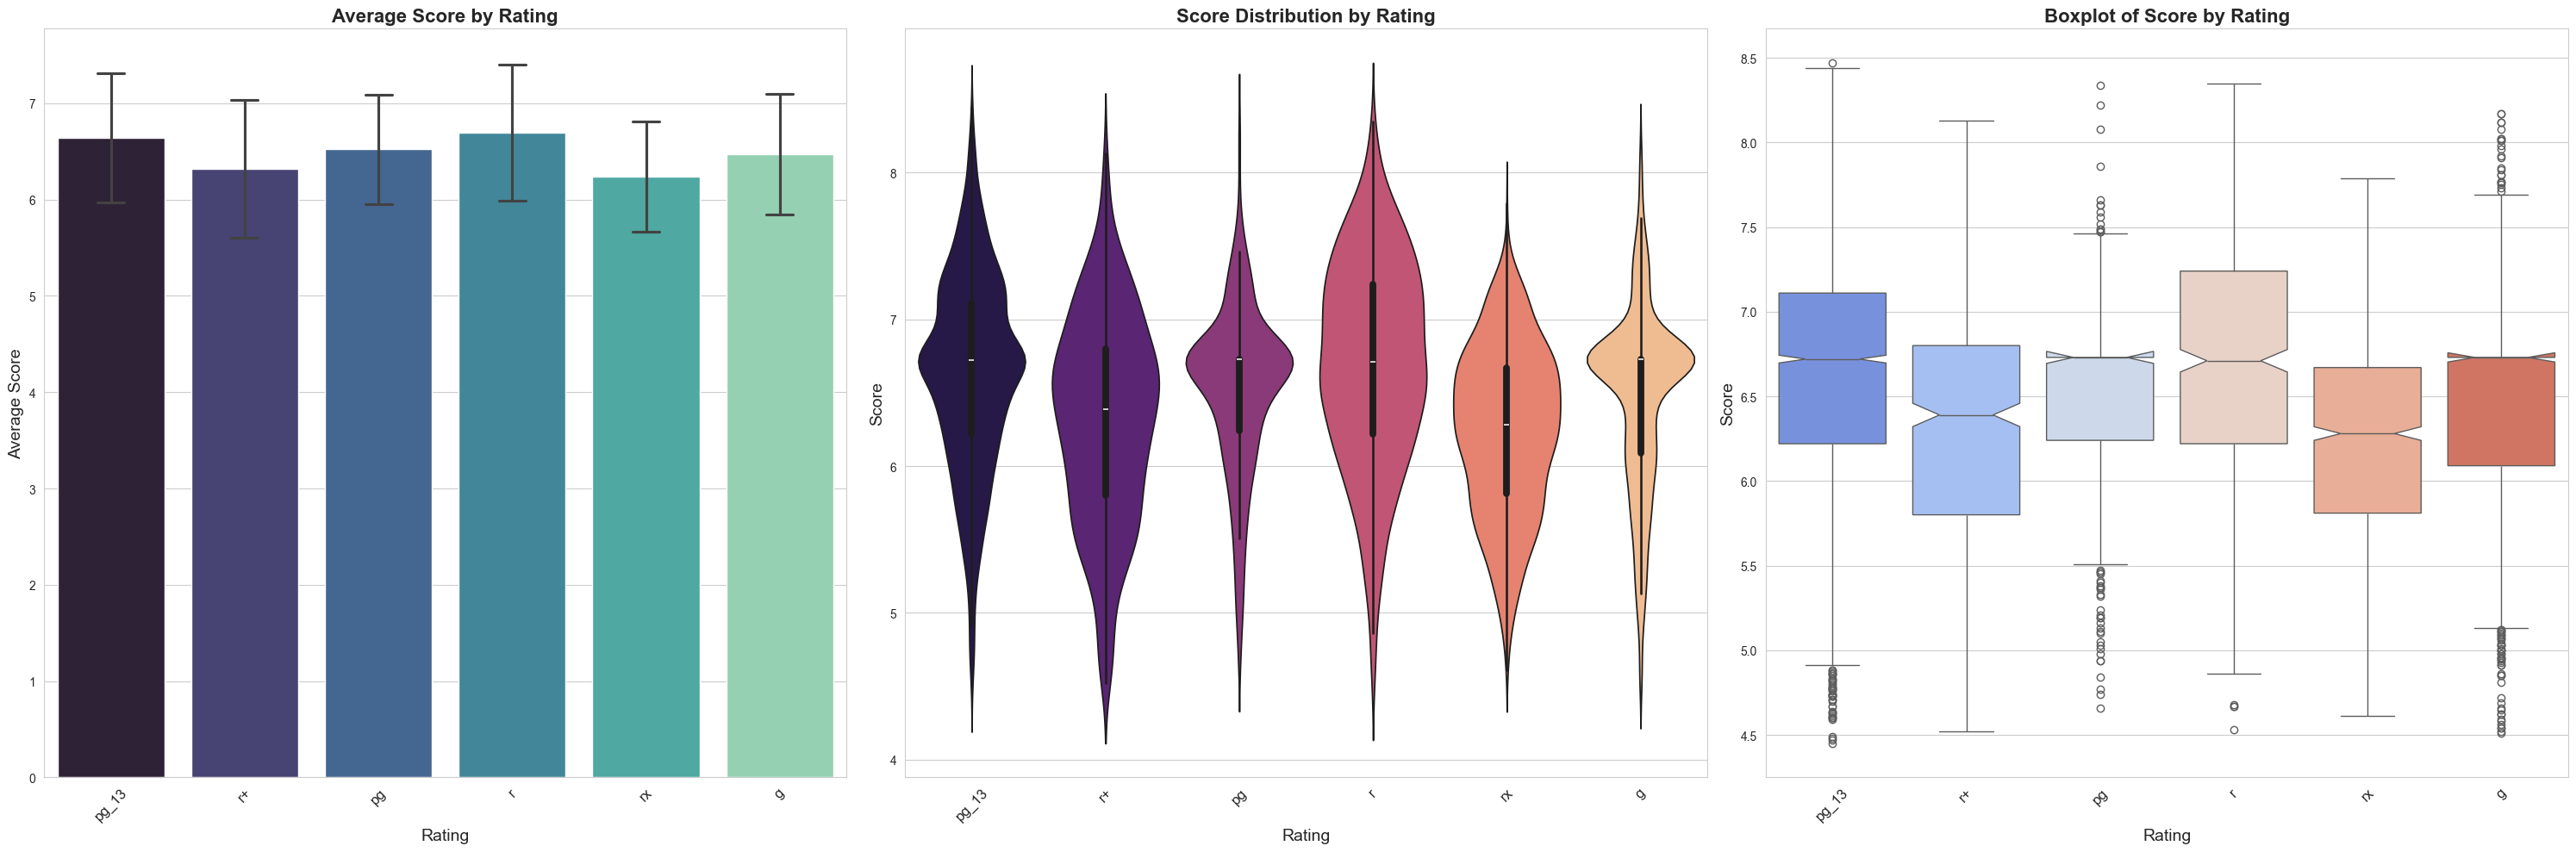

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import numpy as np
from collections import Counter

warnings.filterwarnings('ignore', category=FutureWarning)
sns.set_style("whitegrid")

plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='rocket', linewidths=0.75, square=True,
            cbar_kws={"shrink": 0.75})
plt.title("Full Correlation Matrix", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.regplot(x='Score', y='Members', data=df.dropna(subset=['Score', 'Members']), ax=axes[0], scatter_kws={'alpha': 0.4, 'color': 'blue'}, line_kws={"color": "orange"})
axes[0].set_title("Score vs Members", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Score", fontsize=14)
axes[0].set_ylabel("Members", fontsize=14)

sns.regplot(x='Score', y='Votes', data=df.dropna(subset=['Score', 'Votes']), ax=axes[1], scatter_kws={'alpha': 0.4, 'color': 'green'}, line_kws={"color": "purple"})
axes[1].set_title("Score vs Votes", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Score", fontsize=14)
axes[1].set_ylabel("Votes", fontsize=14)

plt.tight_layout()
plt.show()

top_ratings = df['Rating'].value_counts().index[:10]
df_filtered = df[df['Rating'].isin(top_ratings)]

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
sns.barplot(x='Rating', y='Score', data=df_filtered, ax=axes[0], estimator=np.mean, ci="sd", palette='mako', capsize=0.2)
axes[0].set_title("Average Score by Rating", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Rating", fontsize=14)
axes[0].set_ylabel("Average Score", fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)

sns.violinplot(x='Rating', y='Score', data=df_filtered, ax=axes[1], palette='magma', inner="box", scale="count")
axes[1].set_title("Score Distribution by Rating", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Rating", fontsize=14)
axes[1].set_ylabel("Score", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)

sns.boxplot(x='Rating', y='Score', data=df_filtered, ax=axes[2], palette='coolwarm', notch=True)
axes[2].set_title("Boxplot of Score by Rating", fontsize=16, fontweight='bold')
axes[2].set_xlabel("Rating", fontsize=14)
axes[2].set_ylabel("Score", fontsize=14)
axes[2].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()


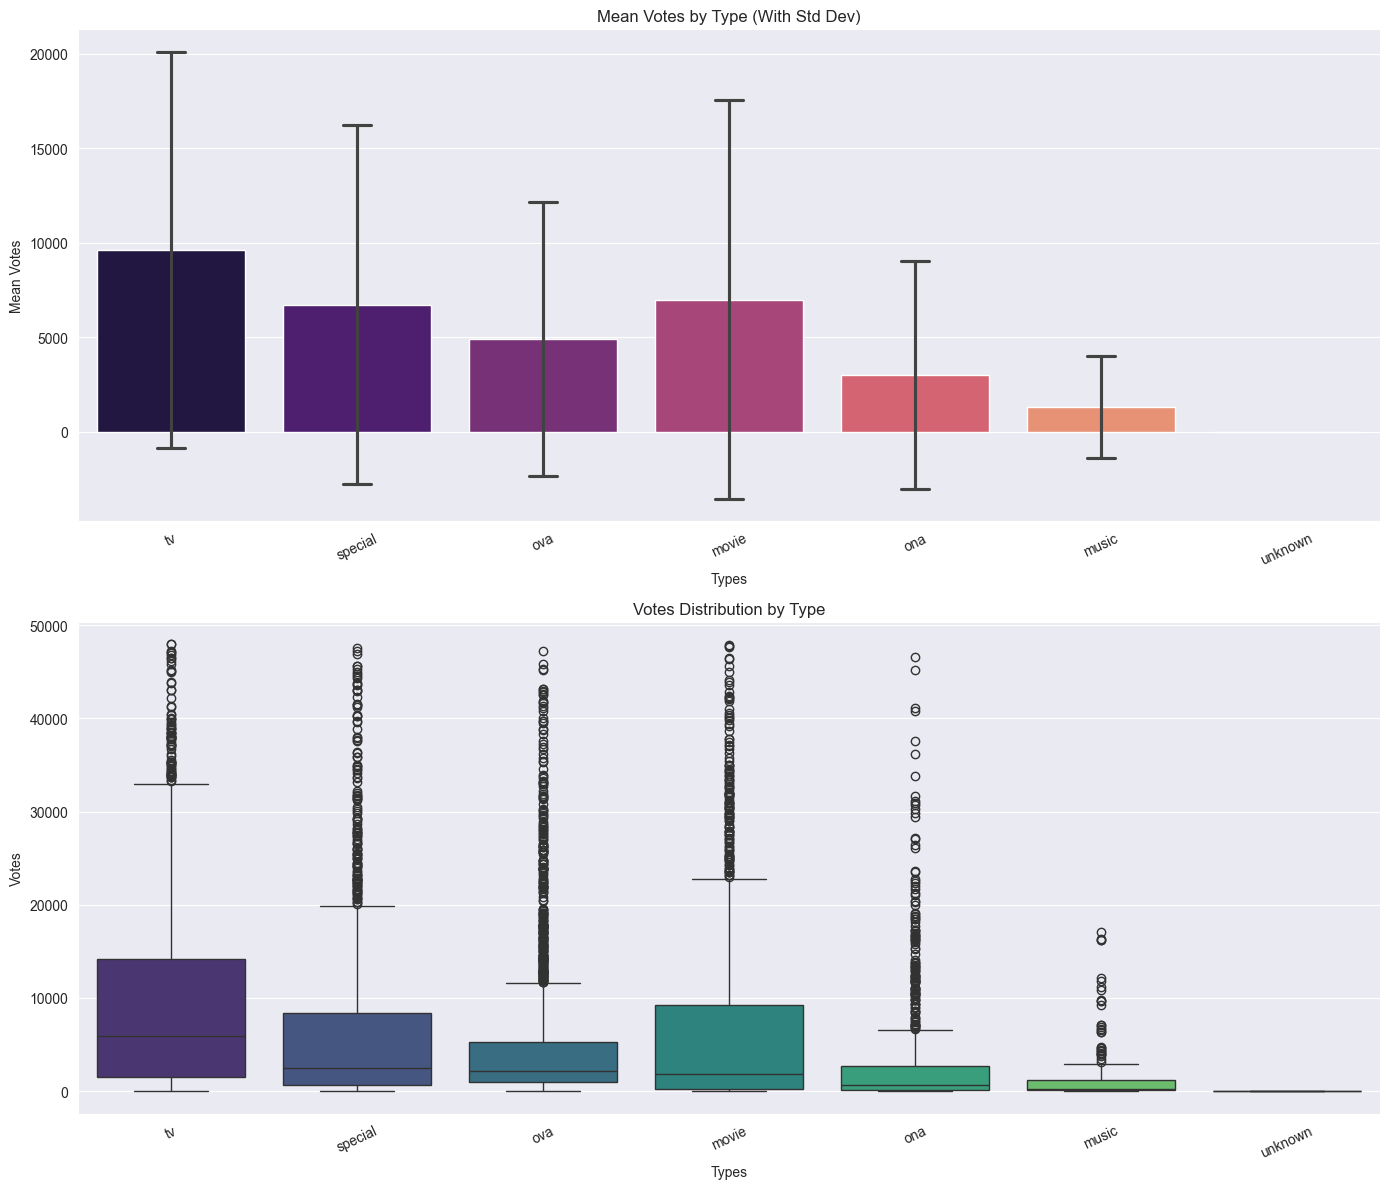

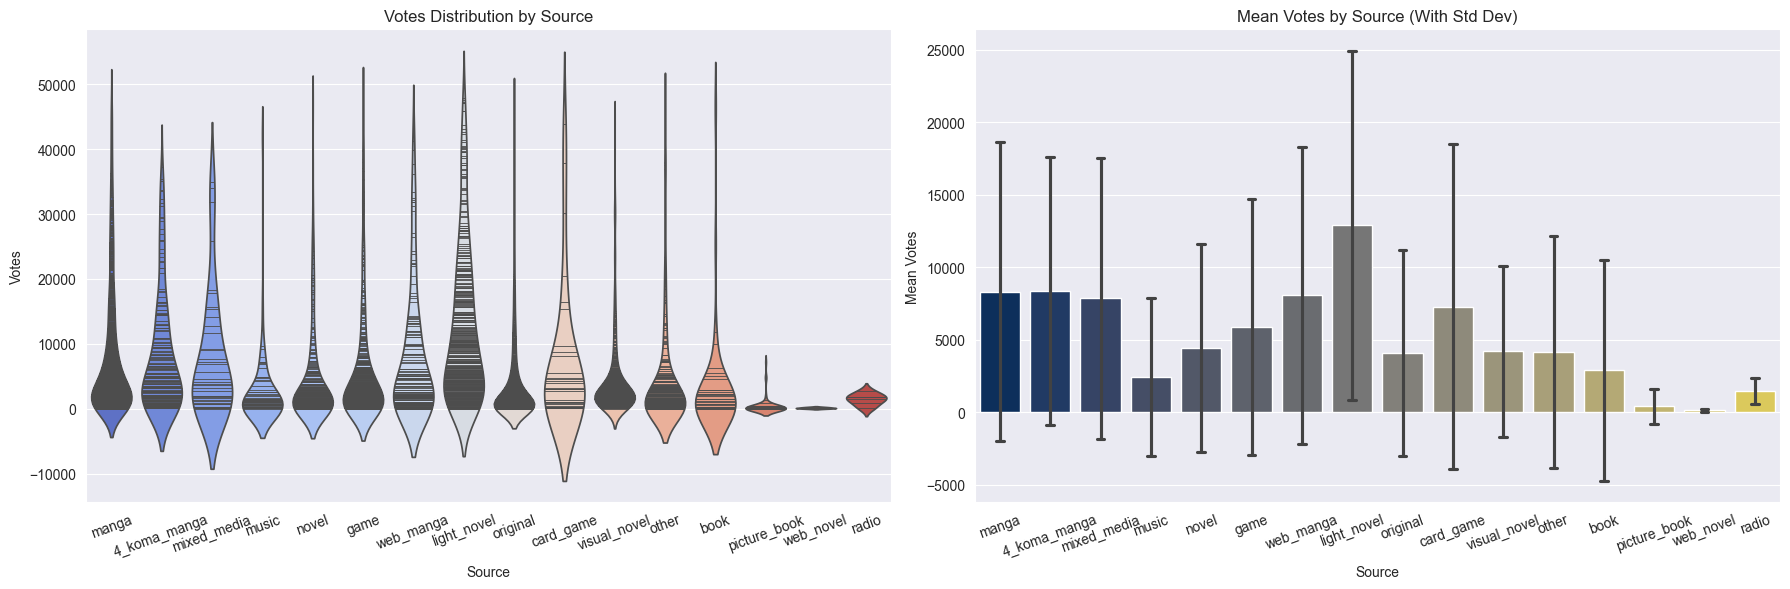

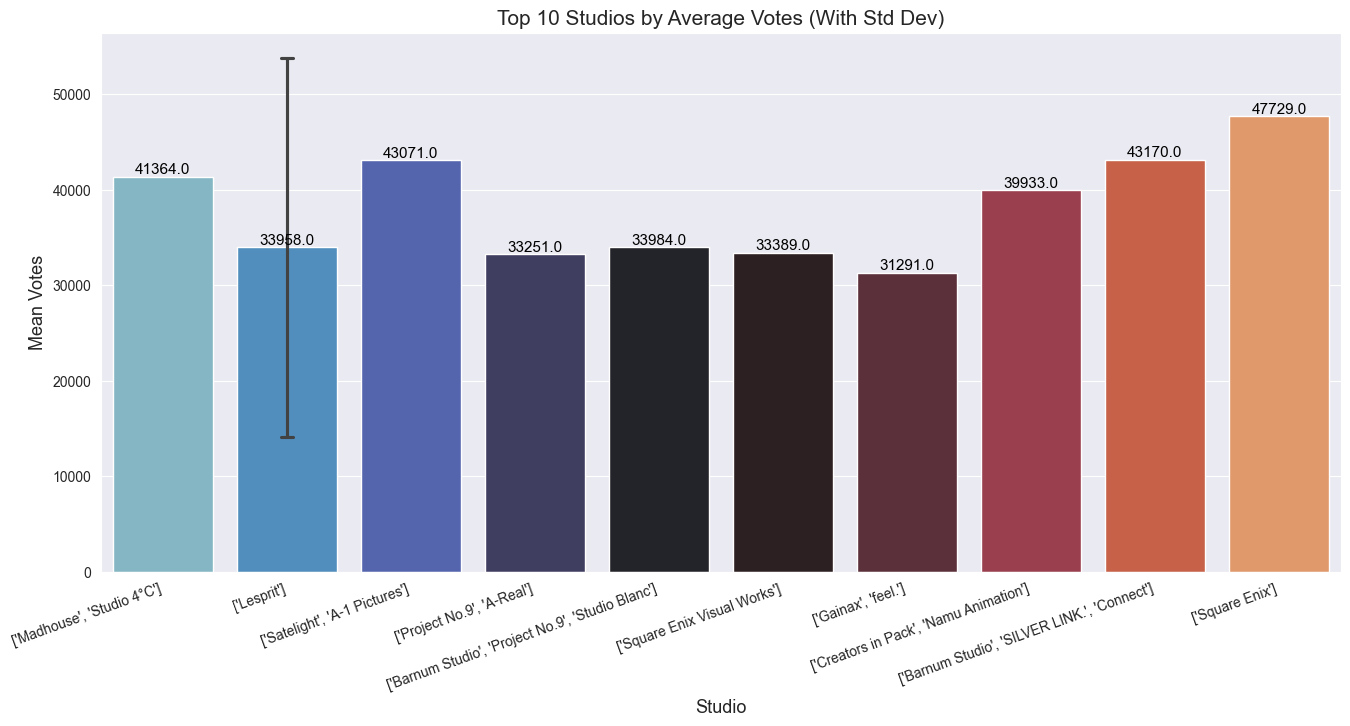

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a different Seaborn style
sns.set_style("darkgrid")

### === 1. Votes vs Type ===
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))  # Changed layout to vertical

# Barplot: Mean votes per type with standard deviation
sns.barplot(data=df, x='Types', y='Votes', ax=axes[0], palette='magma', estimator=np.mean, ci="sd", capsize=0.15)
axes[0].set(title="Mean Votes by Type (With Std Dev)", xlabel="Types", ylabel="Mean Votes")
axes[0].tick_params(axis='x', rotation=25)

# Boxplot: Distribution of votes by type
sns.boxplot(data=df, x='Types', y='Votes', ax=axes[1], palette='viridis', showfliers=True)  # Show outliers
axes[1].set(title="Votes Distribution by Type", xlabel="Types", ylabel="Votes")
axes[1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()


### === 2. Votes vs Source ===
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))  # Adjusted width for better visualization

# Violin Plot: Distribution of votes by source
sns.violinplot(data=df, x='Source', y='Votes', ax=axes[0], palette='coolwarm', inner="stick")  # Inner changed to 'stick'
axes[0].set(title="Votes Distribution by Source", xlabel="Source", ylabel="Votes")
axes[0].tick_params(axis='x', rotation=20)

# Barplot: Mean votes by source
sns.barplot(data=df, x='Source', y='Votes', ax=axes[1], palette='cividis', estimator=np.mean, ci="sd", capsize=0.15)
axes[1].set(title="Mean Votes by Source (With Std Dev)", xlabel="Source", ylabel="Mean Votes")
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


### === 3. Votes vs Studio ===
# Select Top 10 Studios by Average Votes
top_studios = df.groupby("Studios")["Votes"].mean().nlargest(10).index
df_filtered = df[df["Studios"].isin(top_studios)]

plt.figure(figsize=(16, 7))  # Adjusted width-height ratio
ax = sns.barplot(data=df_filtered, x="Studios", y="Votes", palette="icefire", estimator=np.mean, ci="sd", capsize=0.1)
plt.title("Top 10 Studios by Average Votes (With Std Dev)", fontsize=15)
plt.xlabel("Studio", fontsize=13)
plt.ylabel("Mean Votes", fontsize=13)
plt.xticks(rotation=20, ha="right")

# Annotate bars with precise vote values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",  
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha="center", va="bottom", fontsize=11, color="black")

plt.show()


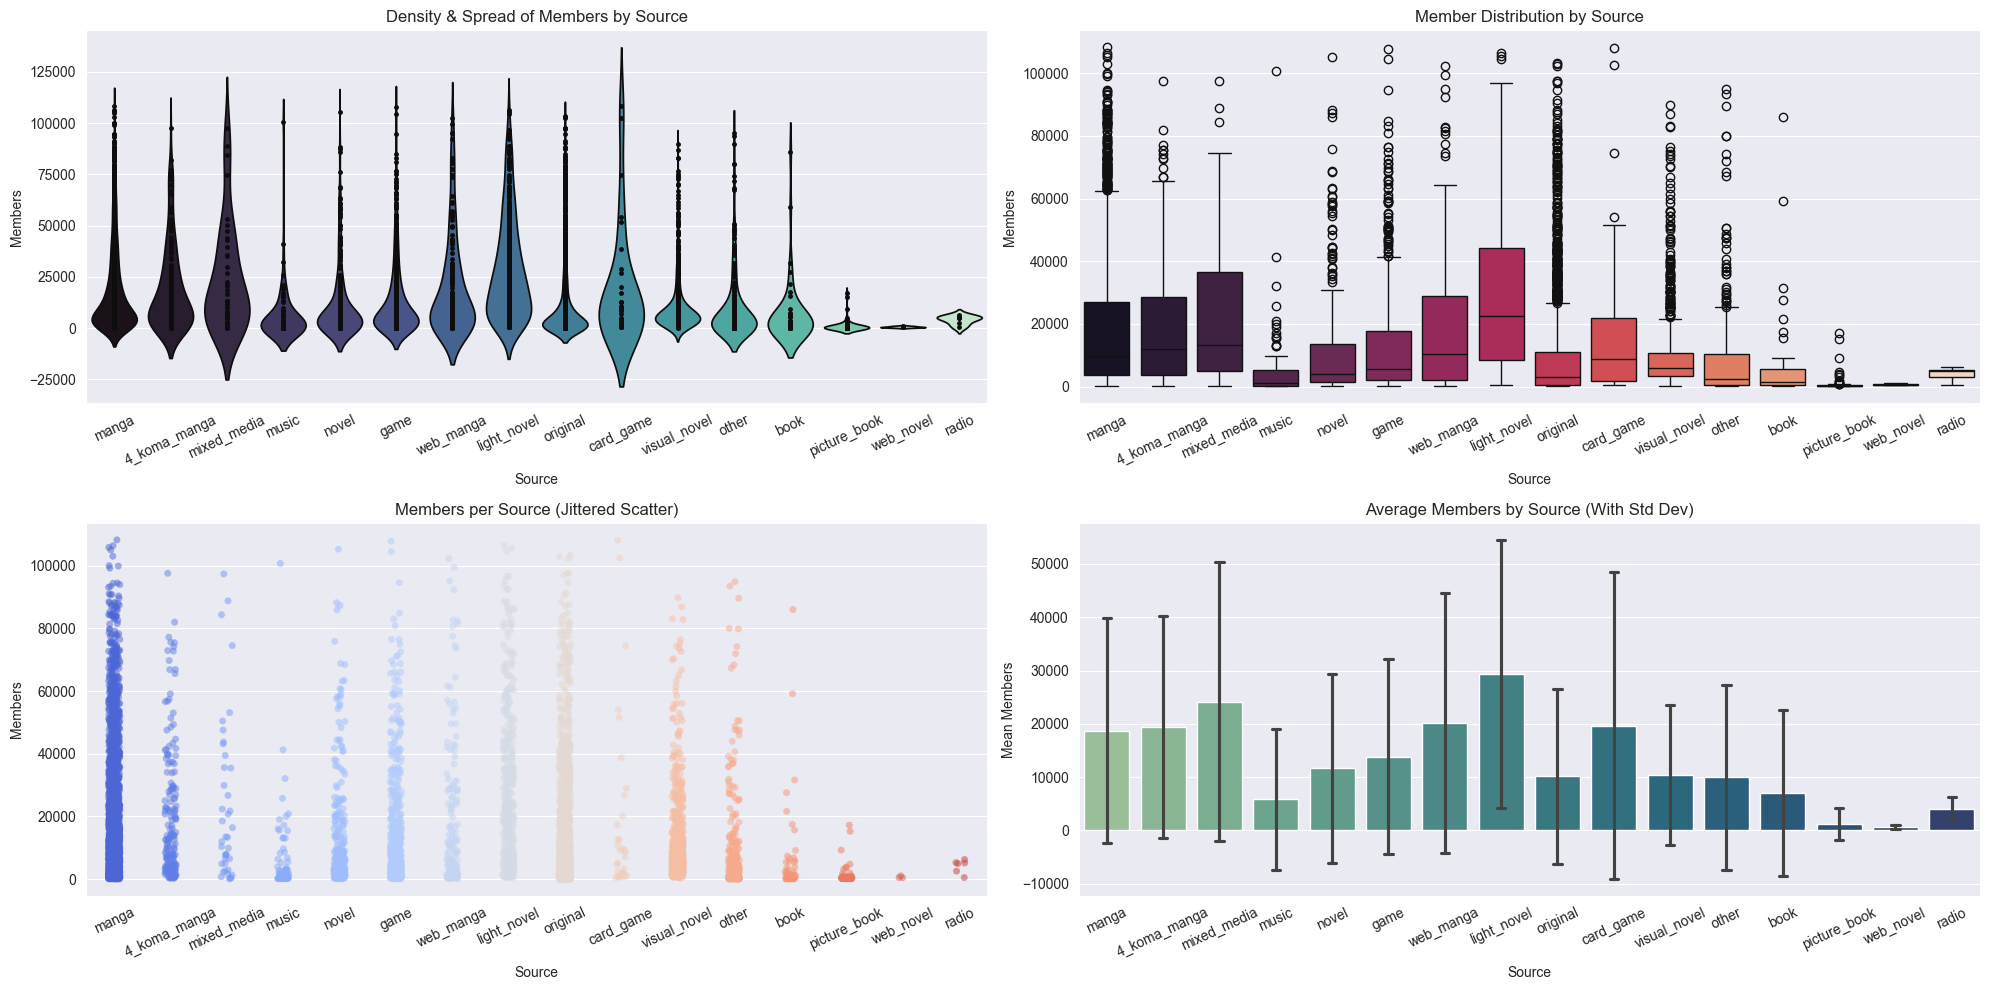

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a different Seaborn style
sns.set_style("darkgrid")

### === Members vs Source ===
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))  # Changed dimensions

# 1. Violin Plot: Density of Members per Source (moved first)
sns.violinplot(data=df, x='Source', y='Members', ax=axes[0, 0], palette='mako', inner="point")  # Changed to 'point'
axes[0, 0].set(title="Density & Spread of Members by Source", xlabel="Source", ylabel="Members")
axes[0, 0].tick_params(axis='x', rotation=25)

# 2. Boxplot: Distribution of Members by Source
sns.boxplot(data=df, x='Source', y='Members', ax=axes[0, 1], palette='rocket', showfliers=True)  # Show outliers
axes[0, 1].set(title="Member Distribution by Source", xlabel="Source", ylabel="Members")
axes[0, 1].tick_params(axis='x', rotation=25)

# 3. Strip Plot: Individual Data Points (Moved to bottom-left, adjusted opacity)
sns.stripplot(data=df, x='Source', y='Members', ax=axes[1, 0], palette='coolwarm', jitter=True, alpha=0.5, size=5)
axes[1, 0].set(title="Members per Source (Jittered Scatter)", xlabel="Source", ylabel="Members")
axes[1, 0].tick_params(axis='x', rotation=25)

# 4. Bar Plot: Mean & Standard Deviation of Members per Source (last position)
sns.barplot(data=df, x='Source', y='Members', ax=axes[1, 1], palette='crest', estimator=np.mean, ci="sd", capsize=0.15)
axes[1, 1].set(title="Average Members by Source (With Std Dev)", xlabel="Source", ylabel="Mean Members")
axes[1, 1].tick_params(axis='x', rotation=25)

plt.tight_layout()
plt.show()
